# Understanding `cross_val_score` and `GridSearchCV` in Machine Learning

In machine learning, it's important to:
- Check how well our model performs on **unseen data**
- Find the **best combination of parameters** for the model

Scikit-learn provides two very helpful tools for this:

---

## 1. `cross_val_score` — Cross-Validation Made Easy

### What it does:
`cross_val_score` evaluates how good your model is by using **cross-validation**.

### Cross-validation (CV) explained simply:
- Split your data into **K equal parts** (folds)
- Use **K-1 parts to train** the model and **1 part to test**
- Repeat this process **K times**, changing the test set each time
- This gives a **more reliable score** than just one train/test split

### What you get:
- A list of scores (one for each fold)
- The **average score** tells you how well your model performs

---

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Initialize model
model = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

print("Accuracy per fold:", scores)
print("Mean accuracy:", scores.mean())

Accuracy per fold: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.96


---
# GridSearchCV Explained – Simple and Detailed

## What is GridSearchCV?

`GridSearchCV` is a tool from **scikit-learn** that helps you find the **best hyperparameters** for your machine learning model.

Think of it like this:
- You want to know which combination of settings (hyperparameters) makes your model perform best.
- `GridSearchCV` tries **every possible combination** from a list you give it.
- It uses **cross-validation** to test how well each combination works.

---

## How GridSearchCV Works (Step-by-Step)

1. You choose a **model** (like `SVC()` or `RandomForestClassifier()`).
2. You create a **parameter grid** — a dictionary of parameters and values you want to try.
3. `GridSearchCV`:
   - Trains the model on different combinations of parameters
   - Uses cross-validation to test performance
   - Finds and returns the **best combination**

---


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize model
svc = SVC()

# Perform grid search with 5-fold CV
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9800000000000001


---
## Example - 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
# 1. Create some sample nonlinear data
np.random.seed(0)
X = np.sort(np.random.rand(100, 1) * 2 - 1, axis=0)  # X in range [-1, 1]
y = X**3 + 0.1 * np.random.randn(100, 1)             # Cubic relation with noise
y = y.ravel()

In [5]:
# 2. Build a pipeline: PolynomialFeatures -> LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),      # generates x^2, x^3, etc.
    ('model', LinearRegression())        # fits the polynomial regression
])

In [6]:
# 3. Define parameter grid (try polynomial degrees from 1 to 5)
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

In [7]:
# 4. Apply GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X, y)

# 5. Show the best result
print("Best degree:", grid.best_params_['poly__degree'])
print("Best CV score (MSE):", -grid.best_score_)

Best degree: 3
Best CV score (MSE): 0.009958684161071697


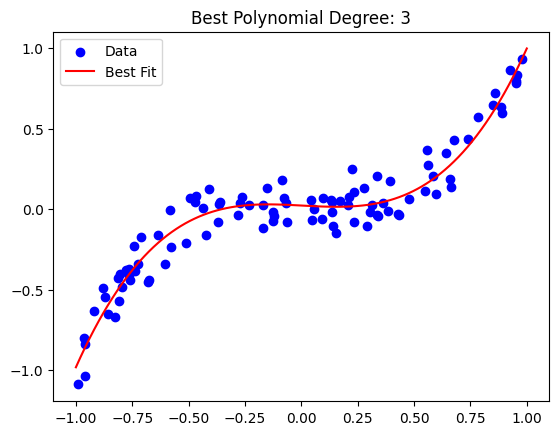

In [8]:
# 6. Plot the result
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = grid.best_estimator_.predict(X_test)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Best Fit')
plt.title(f"Best Polynomial Degree: {grid.best_params_['poly__degree']}")
plt.legend()
plt.show()

---
# Example - 2

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [10]:
# Load dataset
X, y = load_iris(return_X_y=True)

In [11]:
# Define model
rf = RandomForestClassifier()

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [12]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [13]:
# Fit to data
grid_search.fit(X, y)

# Best model and score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy: 0.9666666666666668


In [14]:
# Best model
best_model = grid_search.best_estimator_

In [15]:
import pandas as pd
import seaborn as sns

# Convert cv_results_ to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

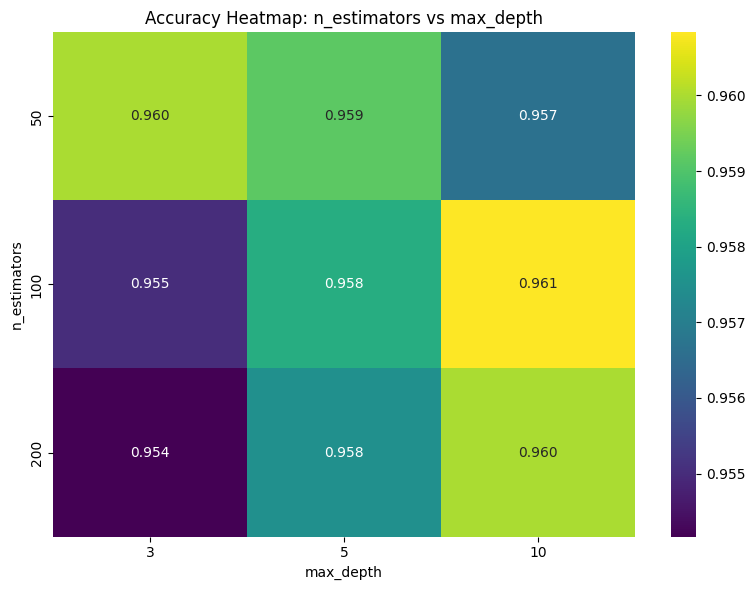

In [16]:
# Pivot the results for heatmap
heatmap_data = results_df.pivot_table(
    values="mean_test_score",
    index="param_n_estimators",
    columns="param_max_depth"
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
plt.title("Accuracy Heatmap: n_estimators vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.tight_layout()
plt.show()

---

## 📒Additional Models

In [17]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy')
search.fit(X, y)
print("Best parameters:", search.best_params_)
print("Best accuracy:", search.best_score_)

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3}
Best accuracy: 0.9666666666666668


In [18]:
best_model = search.best_estimator_

In [19]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

Halving = HalvingGridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
Halving.fit(X, y)
print("Best parameters:", Halving.best_params_)
print("Best accuracy:", Halving.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy: 0.9666666666666666


In [20]:
best_model = Halving.best_estimator_

In [24]:
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)  # Hide trial info

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        random_state=42
    )
    
    score = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print(f"  Accuracy: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


Best trial:
  Accuracy: 0.9666666666666668
  Params: 
    n_estimators: 175
    max_depth: 5
    max_features: None


In [25]:
best_params = study.best_params
best_model = RandomForestClassifier(**best_params, random_state=42)

In [26]:
#Hyperband
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'model__C': [0.1, 1, 10]
}

Hyperband = GridSearchCV(pipeline, param_grid, cv=5)

| Method              | Speed    | Accuracy | Best Use Case                         |
| ------------------- | -------- | -------- | ------------------------------------- |
| GridSearchCV        | ❌ Slow   | ✅ Good   | Small parameter spaces                |
| RandomizedSearchCV  | ✅ Faster | ✅ Good   | Medium-large parameter spaces         |
| HalvingGridSearchCV | ✅ Faster | ✅ Good   | Quick screening, early stopping       |
| Bayesian (Optuna)   | ✅ Smart  | ✅ Best   | Expensive or large parameter tuning   |
| Hyperband           | ✅ Smart  | ✅ Best   | Deep learning / computationally heavy |